In [1]:
from pprint import pprint as print
import numpy as np

from gensim.models.fasttext import FastText
from gensim.test.utils import datapath
import nltk

In [2]:
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [3]:
text = [token for token in text6.tokens[:30]]

In [4]:
# Set file names for train and test data
corpus_file = datapath('lee_background.cor')

model = FastText(size=100)

# build the vocabulary
#model.build_vocab(corpus_file=corpus_file)
#model.build_vocab(sentences=text6.tokens)
model.build_vocab(sentences=text)

# train the model
model.train(
    corpus_file=corpus_file, epochs=model.epochs,
    total_examples=model.corpus_count, total_words=model.corpus_total_words
)

print(model)

In [5]:
# saving a model trained via Gensim's fastText implementation
import tempfile
import os

with tempfile.NamedTemporaryFile(prefix='saved_model_gensim-', delete=False) as tmp:
    model.save(tmp.name, separately=[])

loaded_model = FastText.load(tmp.name)
print(loaded_model)

os.unlink(tmp.name)

In [6]:
print('nights' in model.wv.vocab)

False


In [7]:
print(f'Vocab Size: {len(model.wv.vocab)}')

'Vocab Size: 4'


In [8]:
tokens = model.wv.vocab

vec_embeddings = [model[word] for word in tokens]
print(np.shape(vec_embeddings))

# color for each token for visuals
token_color = [np.random.rand(3,) for _ in range(len(tokens))]

(4, 100)


<ipython-input-8-9bed43e13b2e>:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  vec_embeddings = [model[word] for word in tokens]


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import pandas as pd

In [10]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(vec_embeddings)
print(np.shape(pca_result))

(4, 2)


In [11]:
print(model.wv.vocab)

{'c': <gensim.models.keyedvectors.Vocab object at 0x7f55af20a4c0>,
 'l': <gensim.models.keyedvectors.Vocab object at 0x7f55af20a550>,
 'o': <gensim.models.keyedvectors.Vocab object at 0x7f55af20a340>,
 'p': <gensim.models.keyedvectors.Vocab object at 0x7f55af20a670>}


In [12]:
df = pd.DataFrame(pca_result, columns=['pca_0', 'pca_1'], index=model.wv.vocab)
display(df)

,pca_0,pca_1
c,0.017115,0.025800
l,0.027244,-0.019927
o,-0.022977,0.015225
p,-0.021383,-0.021098


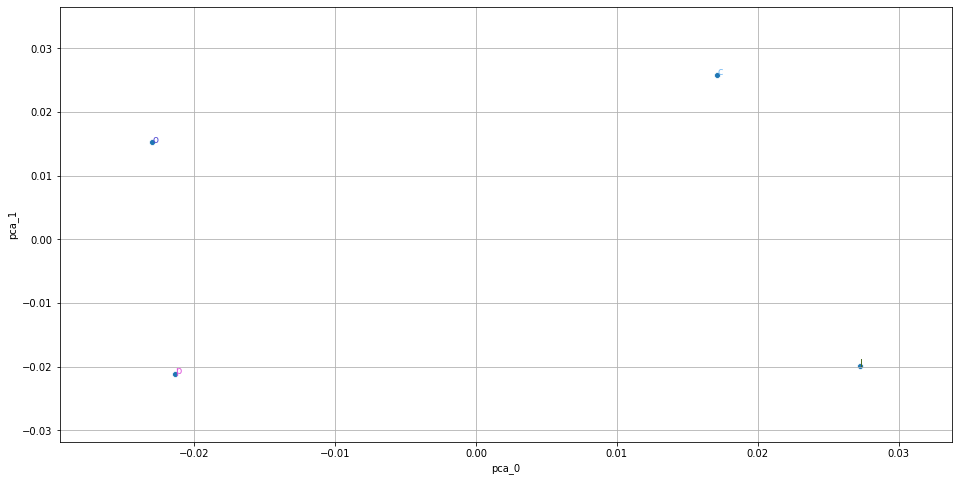

In [13]:
plt.figure(figsize=(16,8))
sns.scatterplot(
    x='pca_0', y='pca_1',
    data=df,
    legend='full'
)
plt.grid()

ax = plt.gca()
for (k, v), color in zip(df.iterrows(), token_color):
    ax.annotate(k, v, c=color)

#for idx, (token, color) in enumerate(zip(tokens, token_color)):
#    plt.text(-7 + idx*1, -10, token, fontsize='medium', color=color)

In [14]:
tsne = TSNE(n_components=2, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(vec_embeddings)
print(np.shape(tsne_results))

(4, 2)


In [15]:
df = pd.DataFrame(tsne_results, columns=['tsne_0', 'tsne_1'], index=tokens)
display(df)

,tsne_0,tsne_1
c,241.601257,52.562386
l,-0.802677,-82.313248
o,-183.758270,122.872765
p,49.045994,195.348572


"\nfor idx, (token, color) in enumerate(zip(tokens, token_color)):\n    plt.text(-400 + idx*50, -400, token, fontsize='medium', color=color)\n"

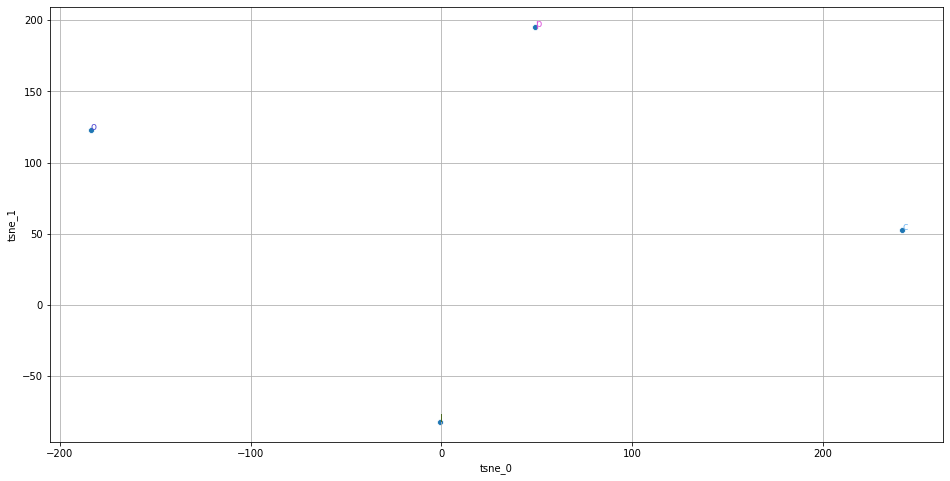

In [16]:
plt.figure(figsize=(16,8))
sns.scatterplot(
    x="tsne_0", y="tsne_1",
    data=df,
    legend="full"
)
plt.grid()

ax = plt.gca()
for (k, v), color in zip(df.iterrows(), token_color):
    ax.annotate(k, v, c=color)

'''
for idx, (token, color) in enumerate(zip(tokens, token_color)):
    plt.text(-400 + idx*50, -400, token, fontsize='medium', color=color)
'''